In [1]:
import scipy.signal as spsig
import pytry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
data = pd.DataFrame(pytry.read('Training_500x3'))
keys_goal_test = [k for k in data.keys() for v in data[k] if k.startswith('output_goal_test')]
keys_noplay_test = [k for k in data.keys() for v in data[k] if k.startswith('output_noplay_test')]
keys_aimless = [k for k in data.keys() for v in data[k] if k.startswith('output_aimless')]
keys_training = ['output_goal_train', 'output_noplay_train']
data2={}
for j in range(20):
    for k in keys_goal_test:
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    for k in keys_noplay_test:
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    for k in keys_aimless:
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    for k in keys_training:
        a=data[k][j+20]['output']
        data2[k]=pd.Series([a])
    if j==0:
        data2=pd.DataFrame(data2)
        data3=data2
    else:
        data2=pd.DataFrame(data2)
        data3=data3.append(data2, ignore_index=True)
data3

,output_goal_test000,output_goal_test001,output_goal_test002,output_goal_test003,output_goal_test004,output_goal_test005,output_goal_test006,output_goal_test007,output_goal_test008,output_goal_test009,...,output_aimless042,output_aimless043,output_aimless044,output_aimless045,output_aimless046,output_aimless047,output_aimless048,output_aimless049,output_goal_train,output_noplay_train
0,"[[0.023161807130890895], [0.1228588995810766],...","[[0.09253695223985636], [0.24068840167364414],...","[[-0.10675361182768103], [-0.12301433541134157...","[[-0.003634453915005914], [0.07759055559299763...","[[-0.06834221694310558], [-0.0732749453066472]...","[[-0.19481989982780168], [-0.26239710345874356...","[[-0.041245873025650845], [0.00011282269099342...","[[-0.058752201061143684], [-0.0685004109111851...","[[-0.06165651926557762], [-0.05410419836386686...","[[-0.013948112372778175], [0.07458578359331192...",...,"[[-0.03662567482782679], [0.08526513377710772]...","[[-0.1377617995026779], [-0.19722028508600814]...","[[-0.1674621025448807], [-0.24229419890909795]...","[[-0.10913997255488217], [-0.11679554086078421...","[[-0.12406077708972038], [-0.14461214376027348...","[[-0.021653553317399155], [0.02990268315627031...","[[-0.05819816208615346], [-0.03527655066859697...","[[-0.1970483194627511], [-0.2506529087986837],...","[[-0.03958567416845278], [0.05789091312829049]...","[[0.21592068956835408], [-0.03605163988083371]..."
1,"[[0.023161807130890895], [0.1228588995810766],...","[[0.09253695223985636], [0.24068840167364414],...","[[-0.10675361182768103], [-0.12301433541134157...","[[-0.003634453915005914], [0.07759055559299763...","[[-0.06834221694310558], [-0.0732749453066472]...","[[-0.19481989982780168], [-0.26239710345874356...","[[-0.041245873025650845], [0.00011282269099342...","[[-0.058752201061143684], [-0.0685004109111851...","[[-0.06165651926557762], [-0.05410419836386686...","[[-0.013948112372778175], [0.07458578359331192...",...,"[[-0.03662567482782679], [0.08526513377710772]...","[[-0.1377617995026779], [-0.19722028508600814]...","[[-0.1674621025448807], [-0.24229419890909795]...","[[-0.10913997255488217], [-0.11679554086078421...","[[-0.12406077708972038], [-0.14461214376027348...","[[-0.021653553317399155], [0.02990268315627031...","[[-0.05819816208615346], [-0.03527655066859697...","[[-0.1970483194627511], [-0.2506529087986837],...","[[-0.03958567416845278], [0.05789091312829049]...","[[0.21592068956835408], [-0.03605163988083371]..."
2,"[[0.060580982230047264], [-0.05680565627705847...","[[0.09317141836543175], [0.023969311207596045]...","[[0.22126083943711972], [0.27351404649140443],...","[[0.19773996841503194], [0.24312812104085552],...","[[0.2508359443075746], [0.28620368646865924], ...","[[0.11102315021594994], [0.05311410225028179],...","[[0.17577152475149377], [0.1935003815013867], ...","[[-0.03315880944056865], [-0.3324239767319931]...","[[0.1909517460990755], [0.19957956934590798], ...","[[0.1287256296727184], [0.09857184936532692], ...",...,"[[0.11590380011659362], [0.08295372951560198],...","[[0.038824572347412656], [-0.08978434626704257...","[[-0.045195445360609265], [-0.2413596909000487...","[[0.009514165337410618], [-0.24935990939763142...","[[0.13642528720951425], [0.0986219268313907], ...","[[0.018022543860037377], [-0.09873522615152952...","[[0.07078654623920078], [-0.008848597832289251...","[[0.16143898733080453], [0.1738959778319864], ...","[[0.21102279799934195], [0.252717050174376], [...","[[0.2801201993609941], [0.22903548045812416], ..."
3,"[[0.24089029437432988], [0.2280073309494432], ...","[[0.23582029473148156], [0.21686619069217042],...","[[0.20524046997218948], [0.13800718140757795],...","[[0.23541948378045666], [0.21562030030879745],...","[[0.25923407524640596], [0.24998931239041894],...","[[0.30006047078084325], [0.30299933599195805],...","[[0.24342340942626164], [0.20356531954500082],...","[[0.2788231236047834], [0.26436866584693003], ...","[[0.26845678976612714], [0.2442291035210503], ...","[[0.

In [3]:
keys = [k for k in data3.keys() for v in data3[k]]
values = [v for k in data3.keys() for v in data3[k]]
data3 = pd.DataFrame.from_dict({'pattern':keys, 'output': values})
data3=data3.set_index('pattern')

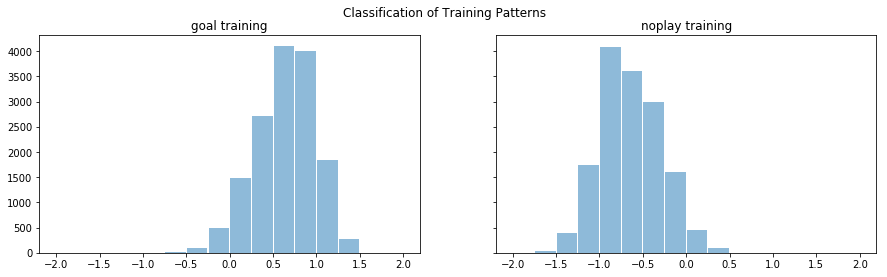

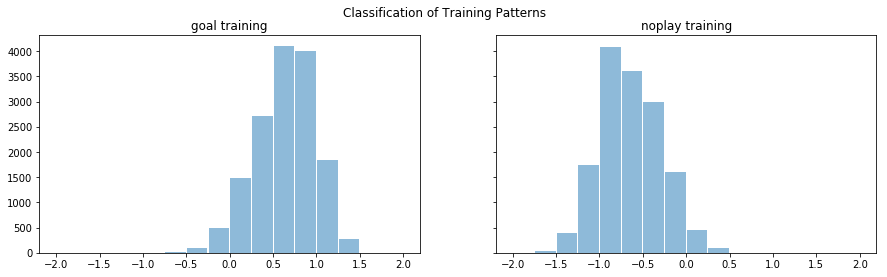

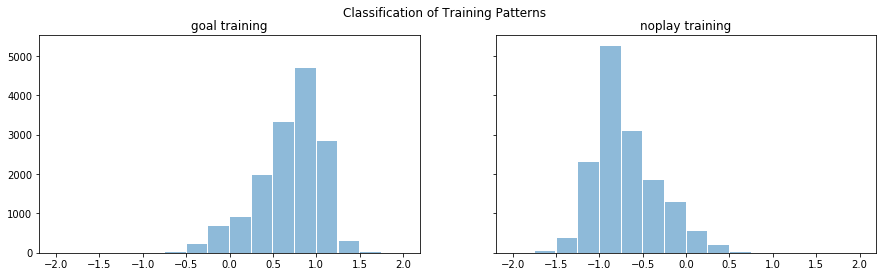

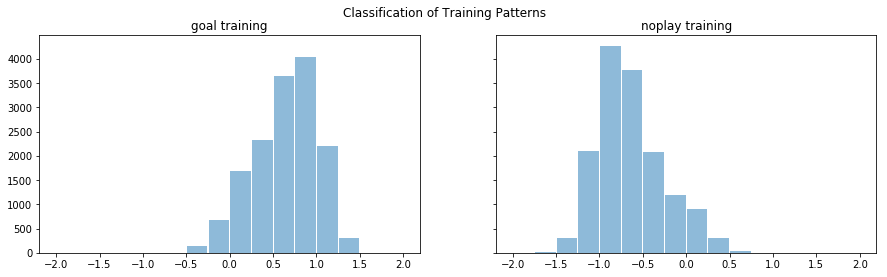

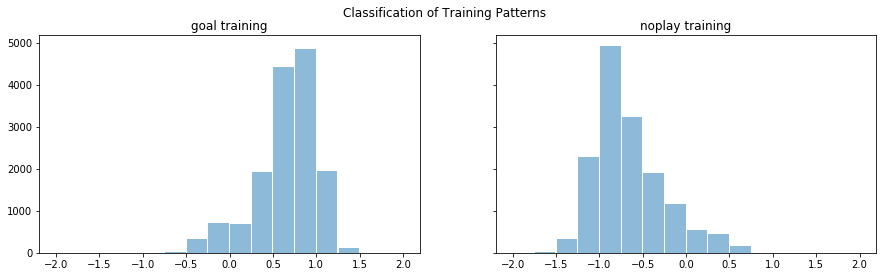

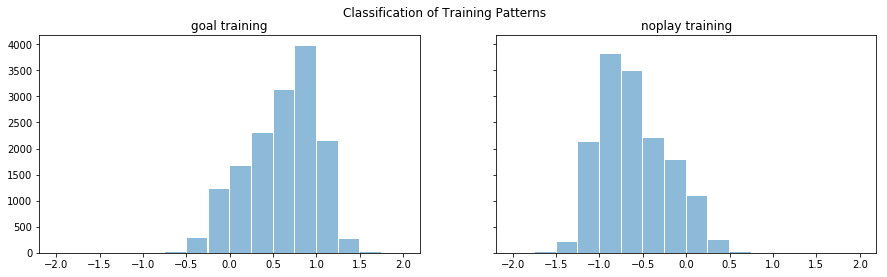

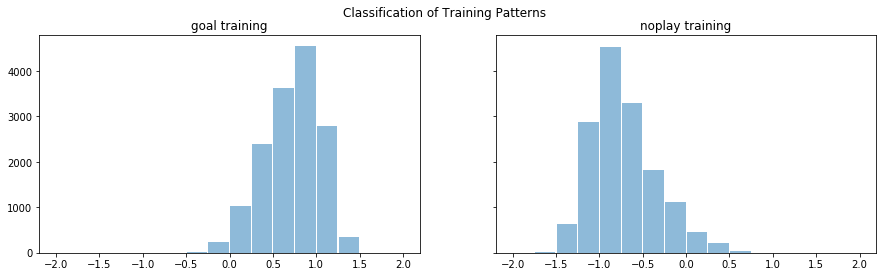

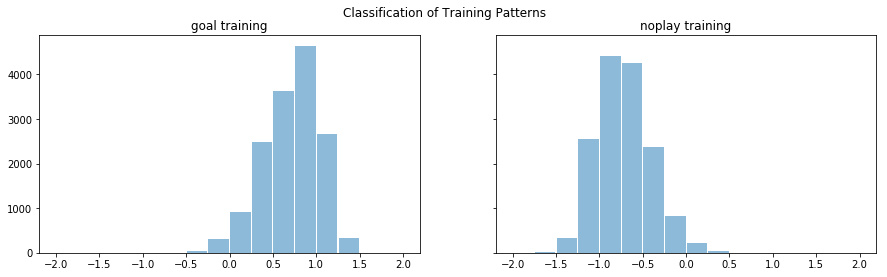

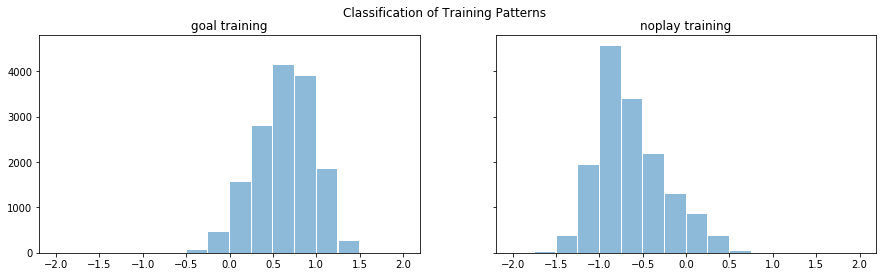

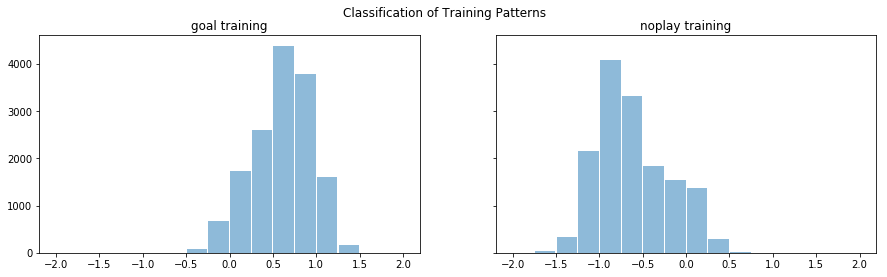

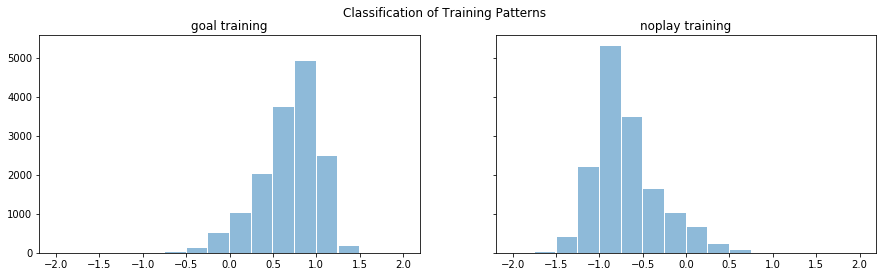

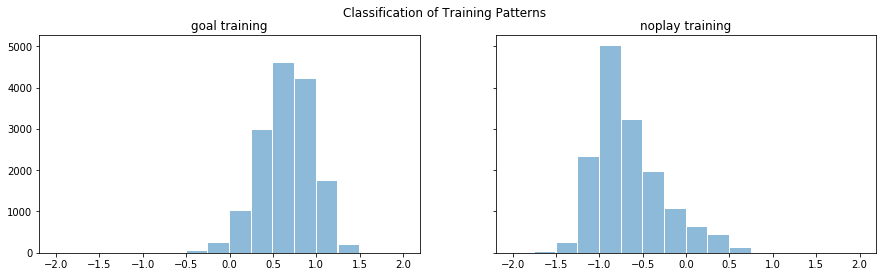

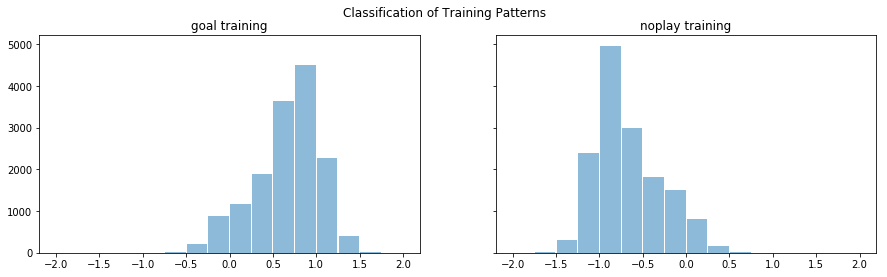

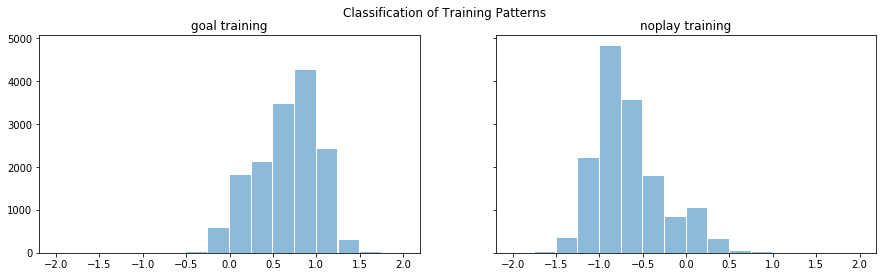

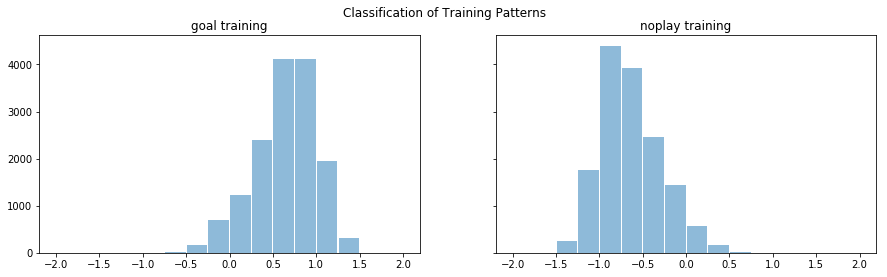

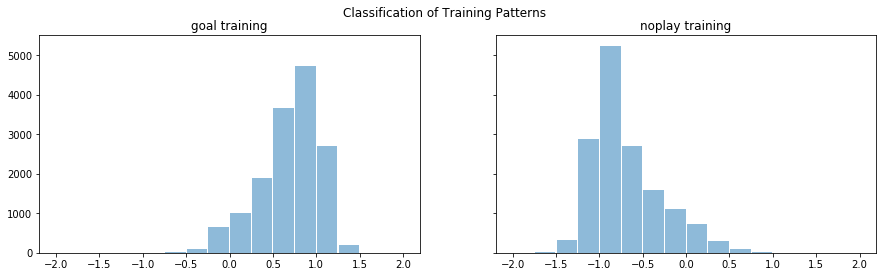

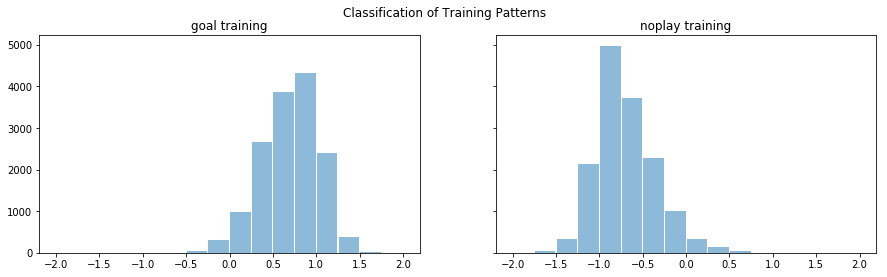

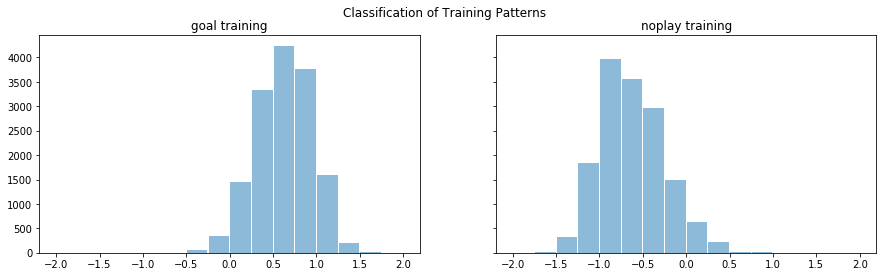

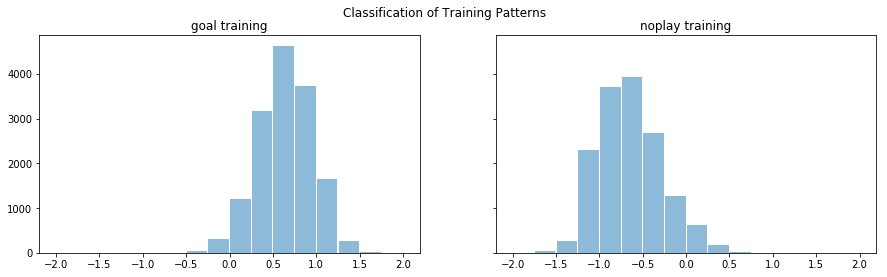

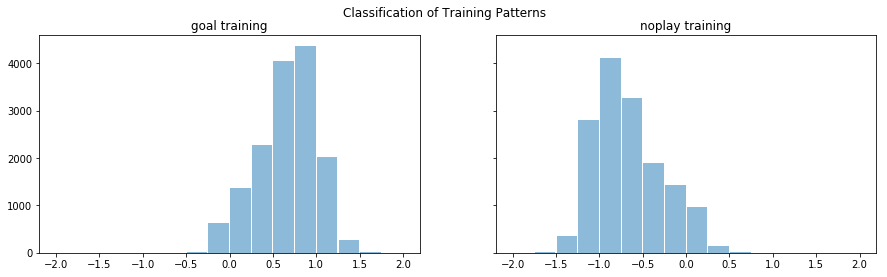

In [4]:
bins=np.arange(-2, 2 + 0.25, 0.25)
for i in range(20):
    exp1 = data3[i::20]

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
    f.suptitle('Classification of Training Patterns')
    ax1.hist((np.hstack(exp1.iloc[87]['output'])), bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
    ax1.set_title('goal training')
    ax2.hist((np.hstack(exp1.iloc[88]['output'])), bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
    ax2.set_title('noplay training')


# Classify Each TimePoint then apply Median Filter to see Most Common Classification

In [5]:
for i in range(len(data3)):
    for j in range(len(data3.iloc[i]['output'])):
        if np.isclose(data3.iloc[i]['output'][j], 1, atol=0.6):
            data3.iloc[i]['output'][j] = 1
        elif np.isclose(data3.iloc[i]['output'][j], 0, atol=0.3):
            data3.iloc[i]['output'][j] = 0  
        else:
            data3.iloc[i]['output'][j] = -1
data3

,output
pattern,
output_goal_test000,"[[0.0], [0.0], [0.0], [-1.0], [1.0], [1.0], [1..."
output_goal_test000,"[[0.0], [0.0], [0.0], [-1.0], [1.0], [1.0], [1..."
output_goal_test000,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
output_goal_test000,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
output_goal_test000,"[[0.0], [0.0], [0.0], [0.0], [-1.0], [-1.0], [..."
output_goal_test000,"[[1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1...."
output_goal_test000,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
output_goal_test000,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
output_goal_test000,"[[-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0..."


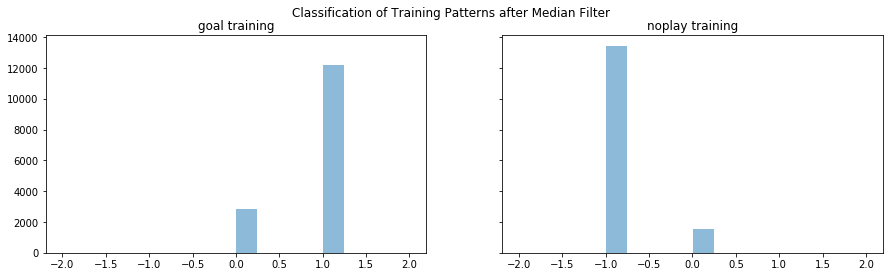

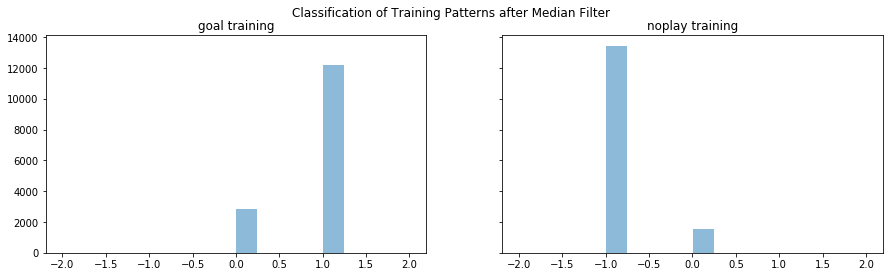

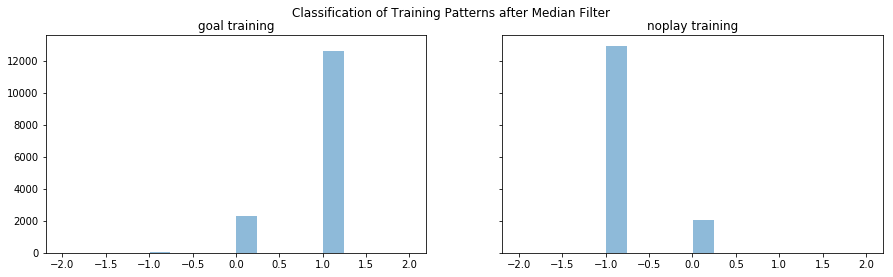

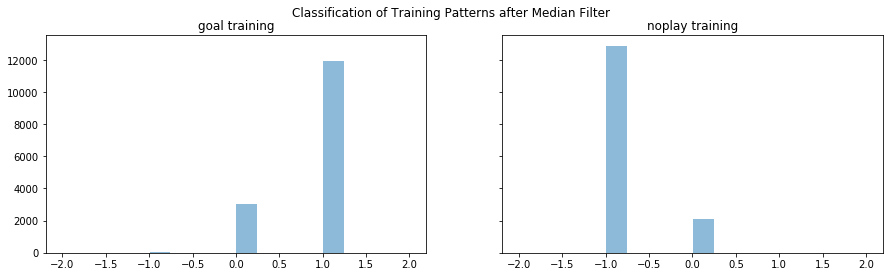

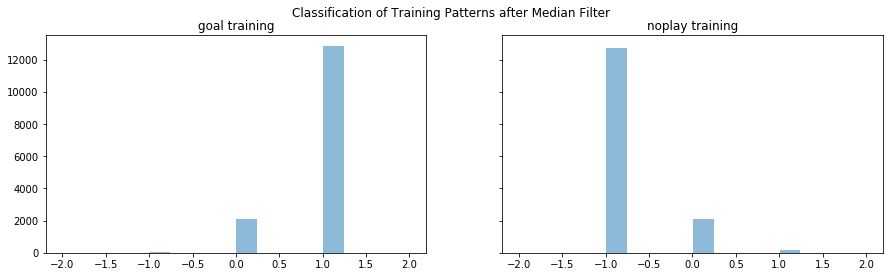

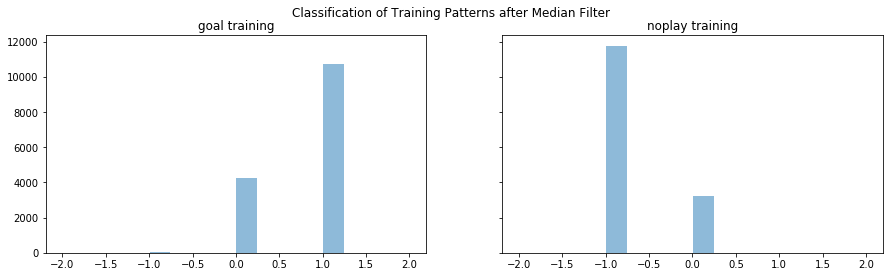

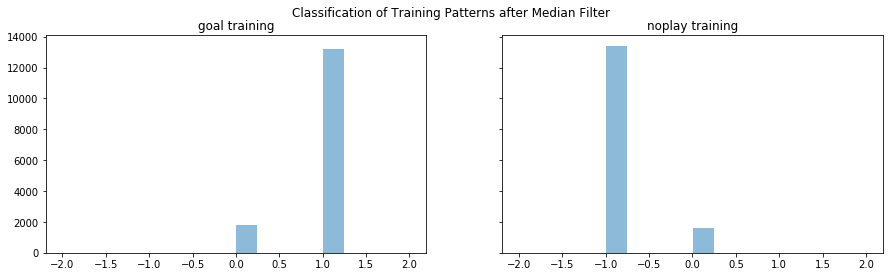

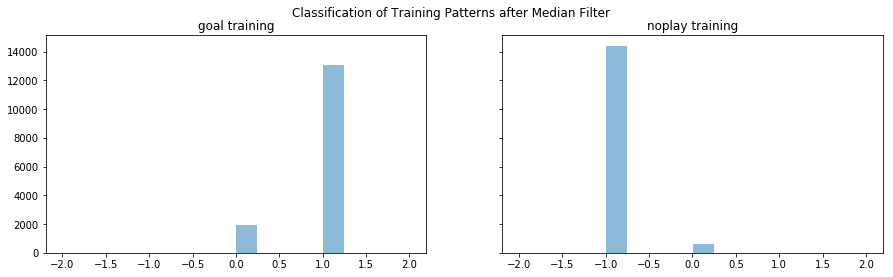

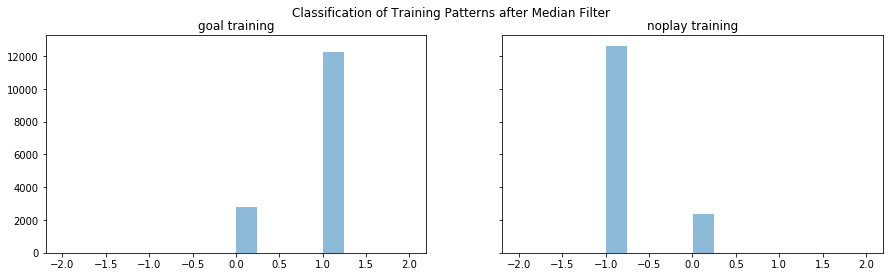

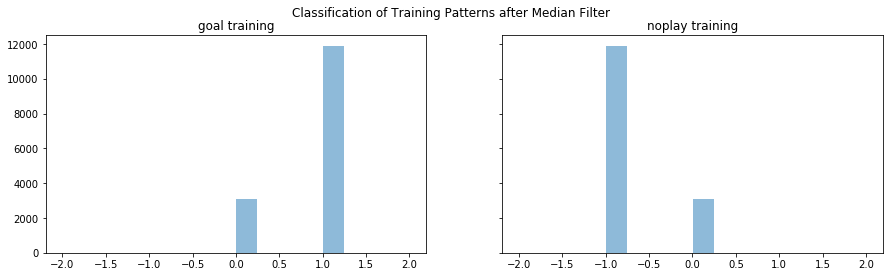

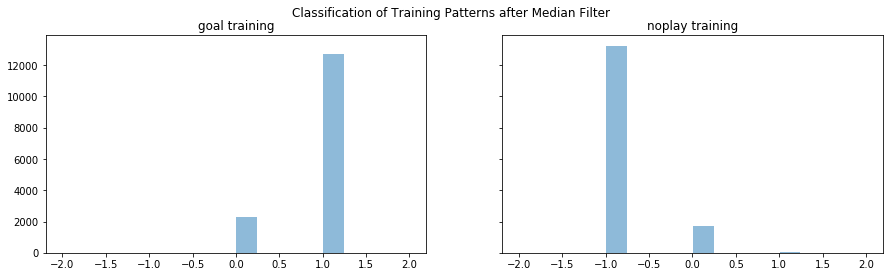

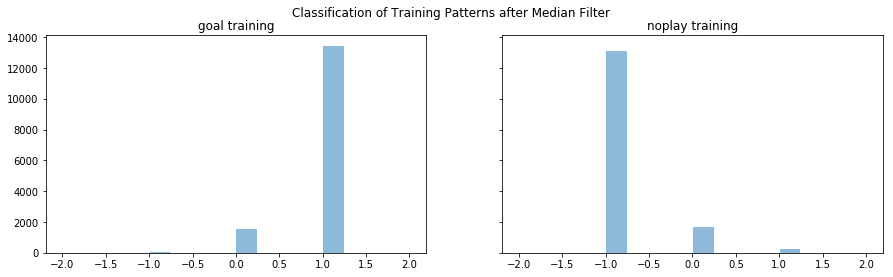

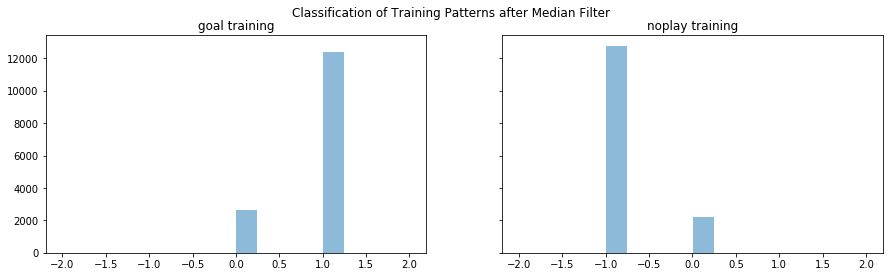

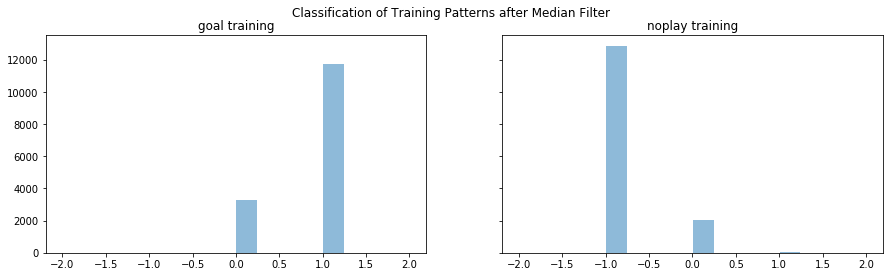

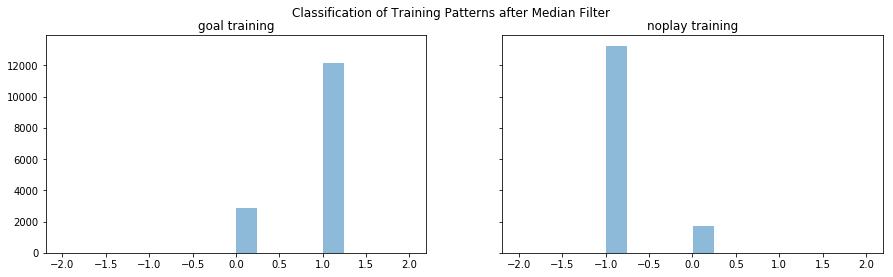

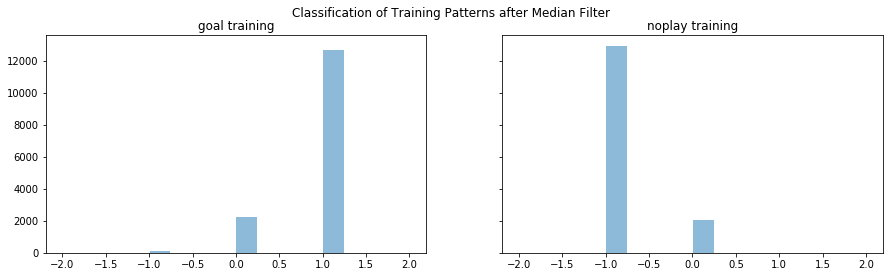

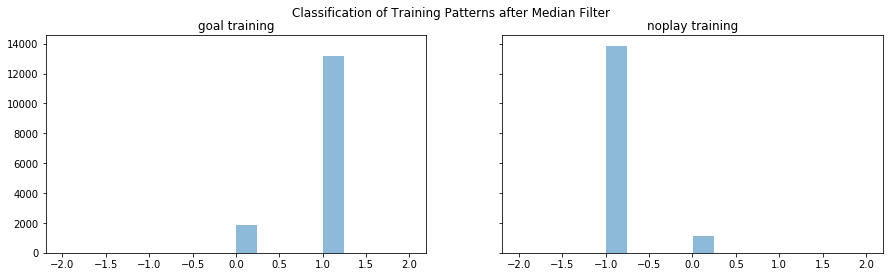

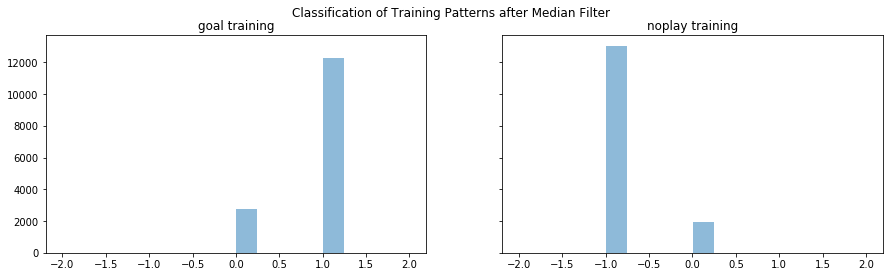

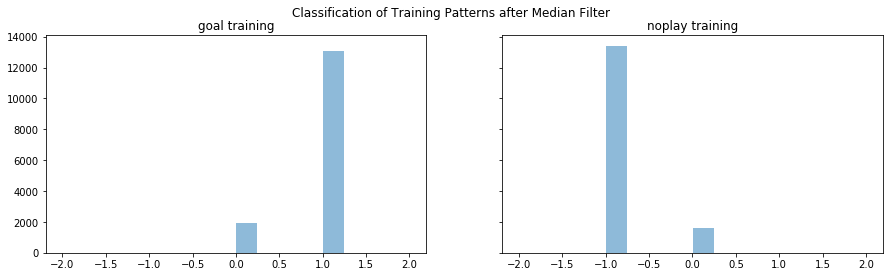

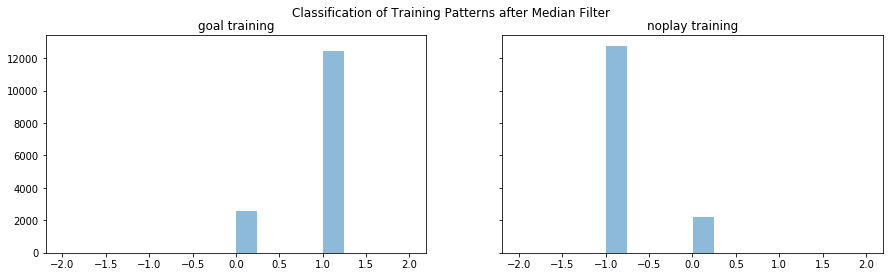

In [6]:
for i in range(20):
    exp1 = data3[i::20]    
    goal_med=spsig.medfilt((np.hstack(exp1.iloc[87]['output'])),99)
    noplay_med=spsig.medfilt((np.hstack(exp1.iloc[88]['output'])),99)

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
    f.suptitle('Classification of Training Patterns after Median Filter')
    ax1.hist(goal_med, bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
    ax1.set_title('goal training')
    ax2.hist(noplay_med, bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
    ax2.set_title('noplay training')

In [7]:
a=0

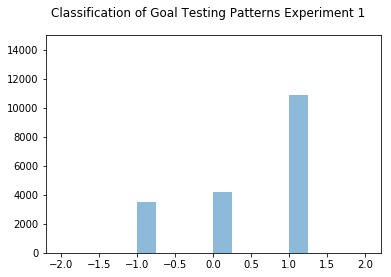

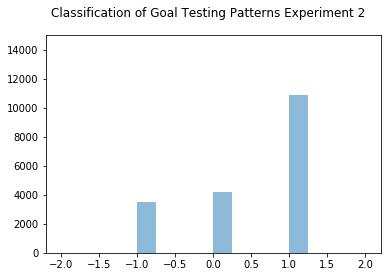

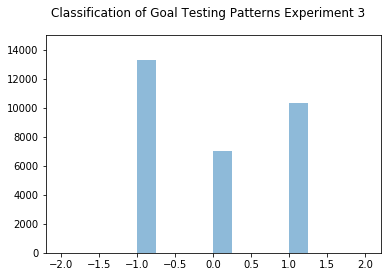

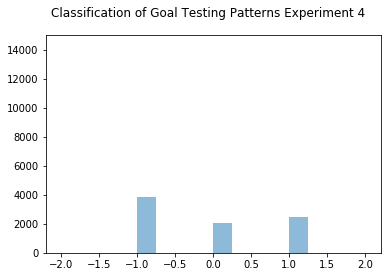

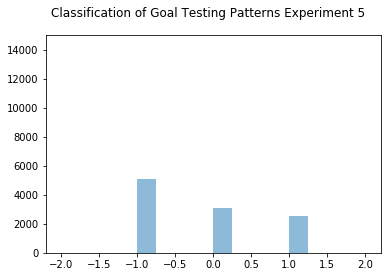

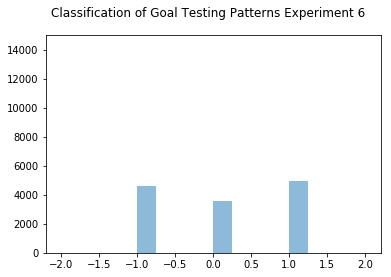

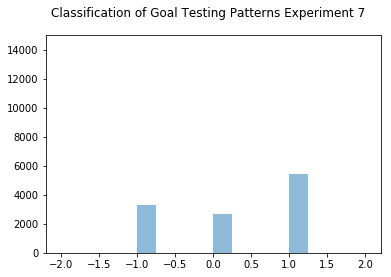

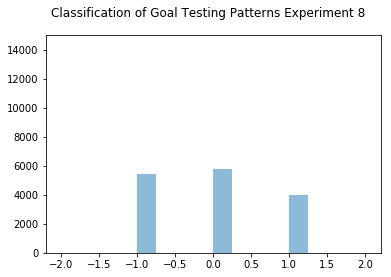

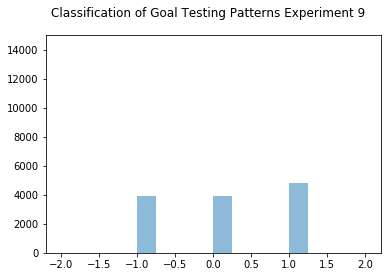

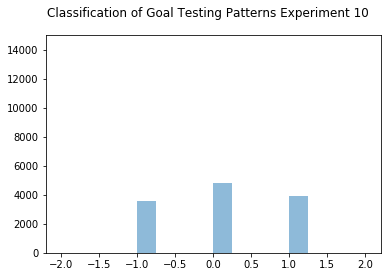

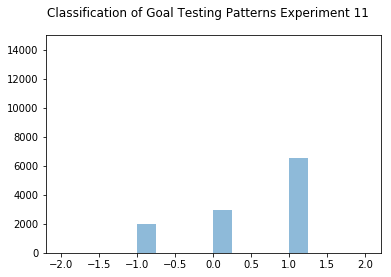

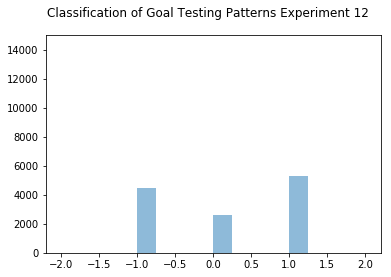

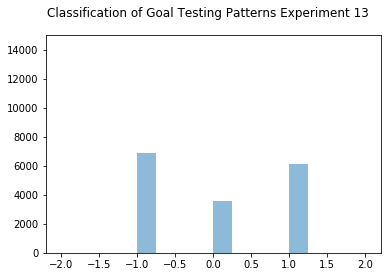

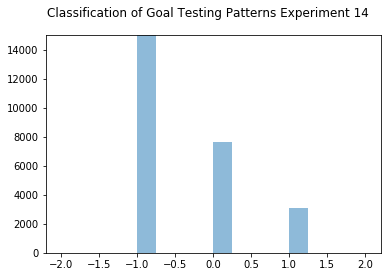

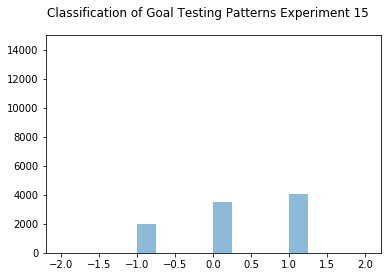

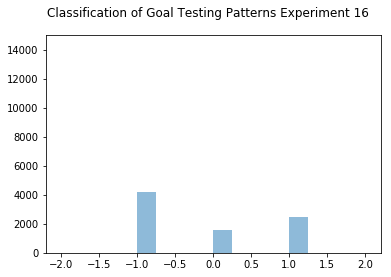

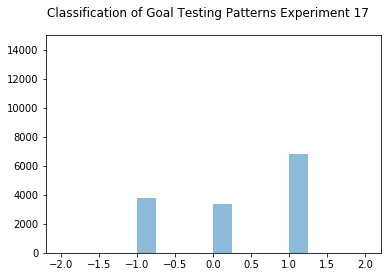

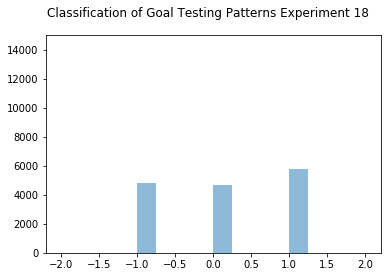

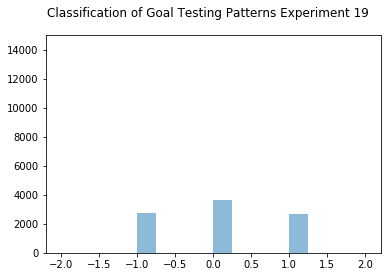

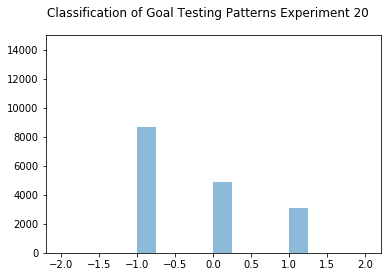

In [8]:
goal_testing=data3.loc['output_goal_test000': 'output_goal_test019']
for i in range(20):
    exp1 = goal_testing[i::20]    
    plt.figure()
    a=[]
    for r in range(len(exp1)):
        b=np.hstack(exp1.iloc[r]['output'])
        b_filt=spsig.medfilt(b,9)
        a=np.concatenate((a, b_filt))
    plt.suptitle('Classification of Goal Testing Patterns Experiment %d' % int(i+1))
    plt.hist(a, bins, alpha = 0.5)
    plt.ylim(0, 15000)
    #plt.plot(a)
    #plt.ylim((-2,2))

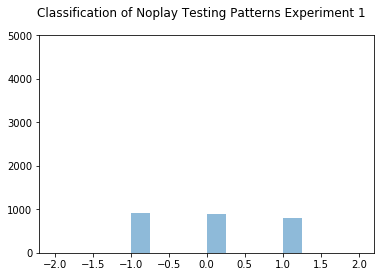

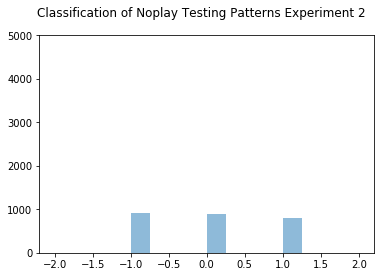

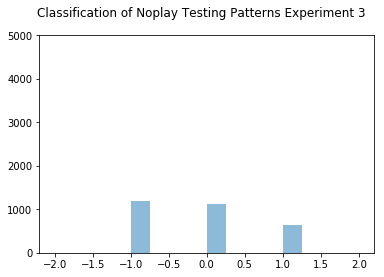

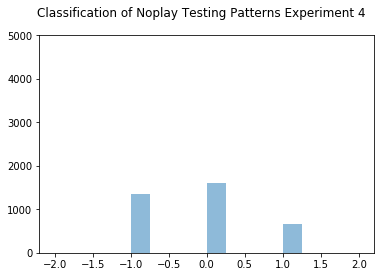

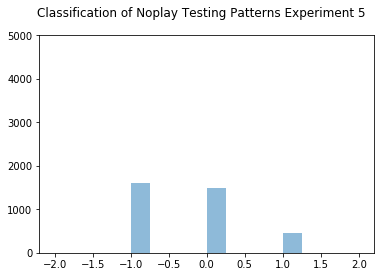

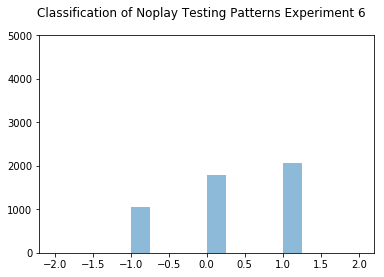

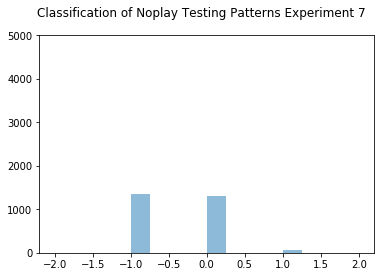

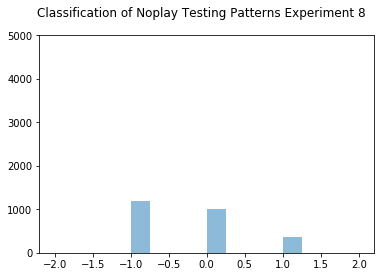

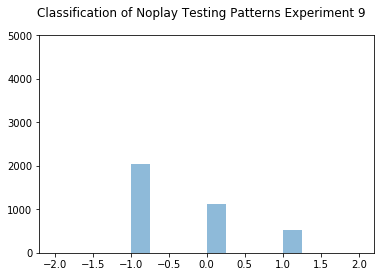

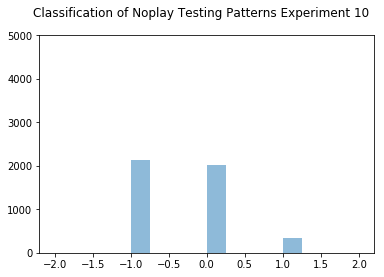

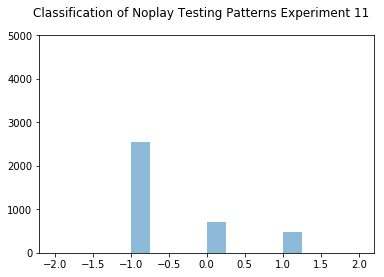

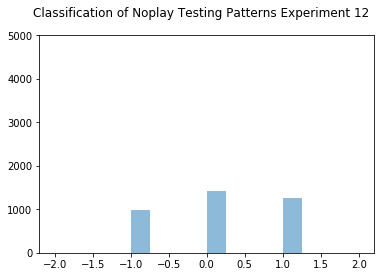

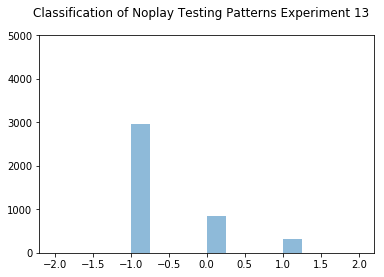

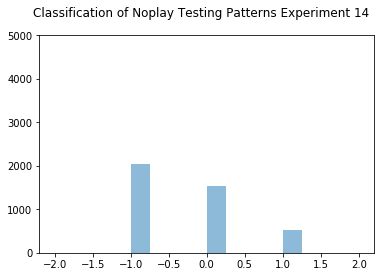

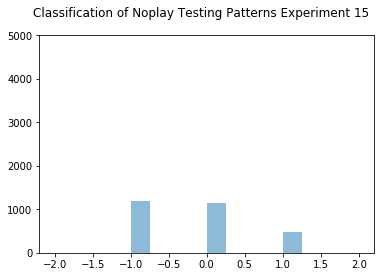

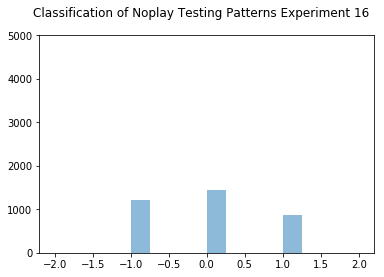

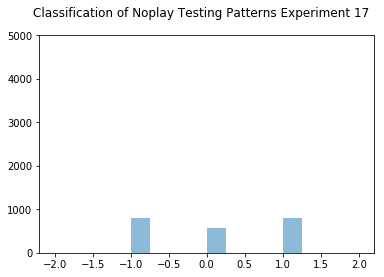

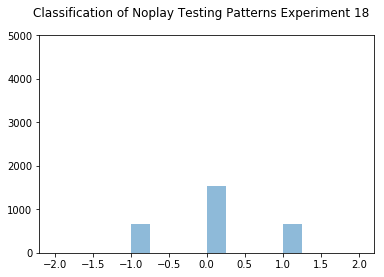

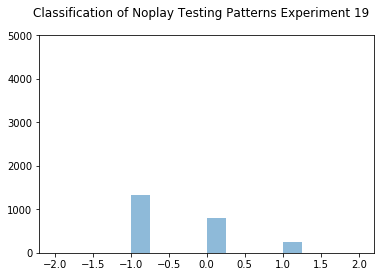

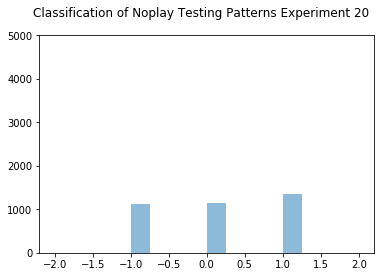

In [9]:
noplay_testing=data3.loc['output_noplay_test000': 'output_noplay_test016']
for i in range(20):
    exp1 = noplay_testing[i::20]    
    plt.figure()
    a=[]
    for r in range(len(exp1)):
        b=np.hstack(exp1.iloc[r]['output'])
        b_filt=spsig.medfilt(b,9)
        a=np.concatenate((a, b_filt))
    plt.suptitle('Classification of Noplay Testing Patterns Experiment %d' % int(i+1))
    plt.hist(a, bins, alpha = 0.5)
    plt.ylim(0, 5000)
    #plt.plot(a)
    #plt.ylim((-2,2))

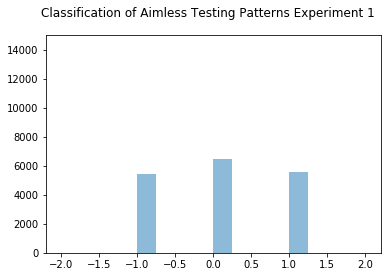

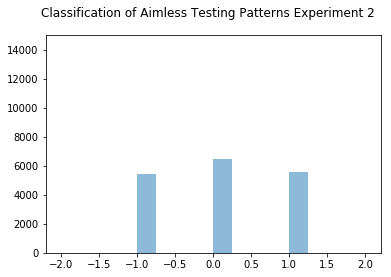

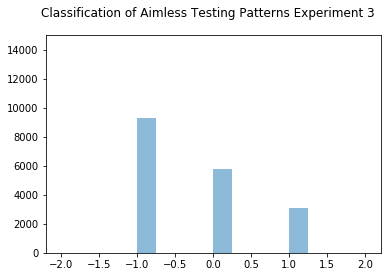

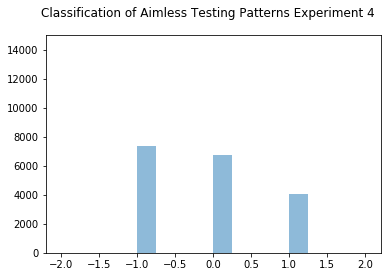

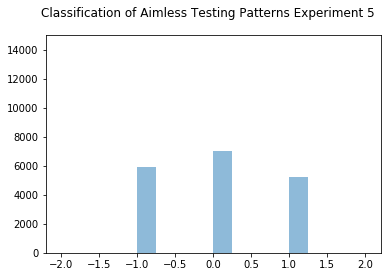

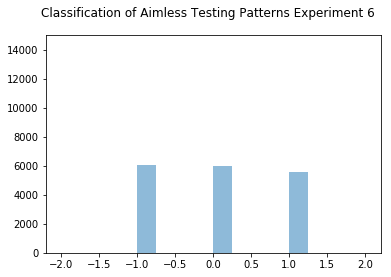

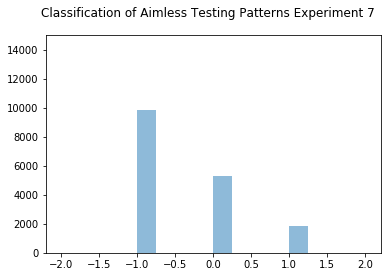

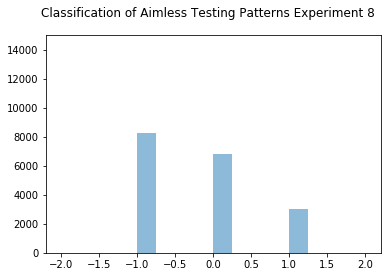

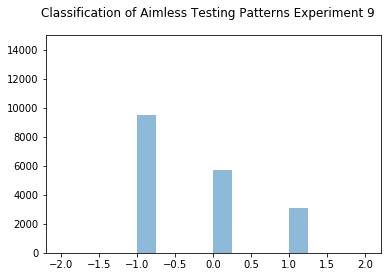

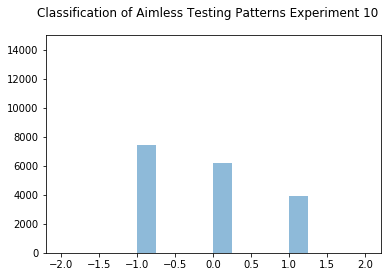

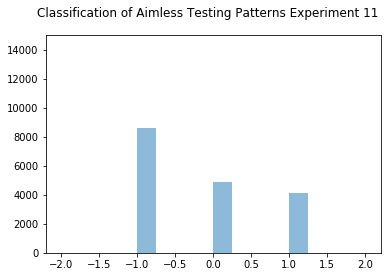

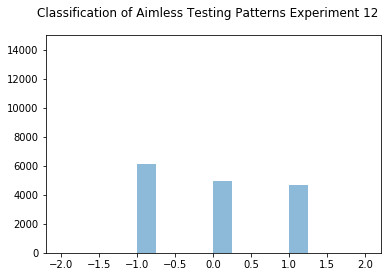

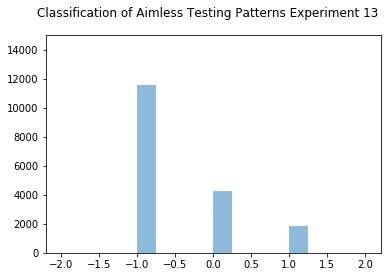

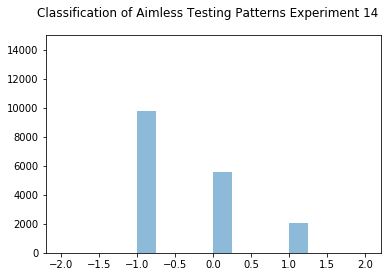

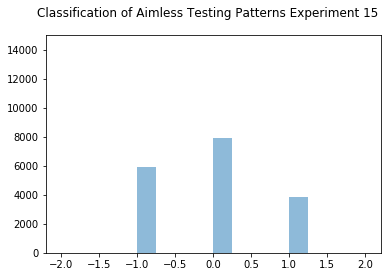

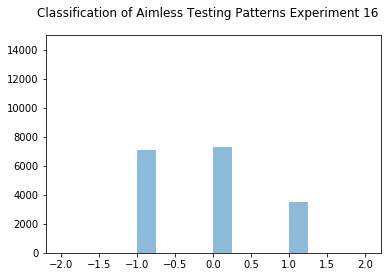

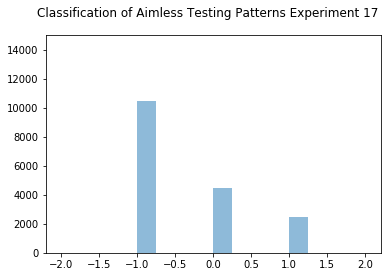

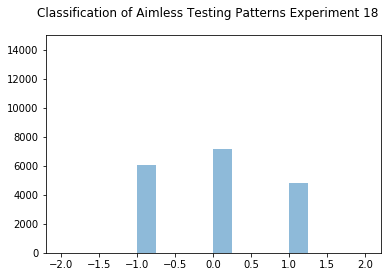

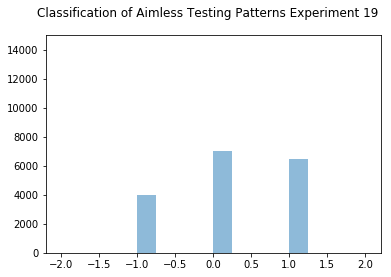

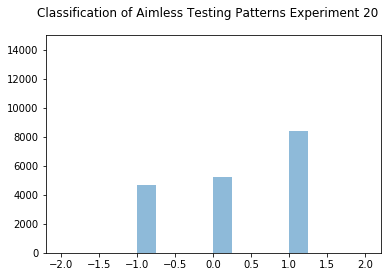

In [10]:
aimless_testing=data3.loc['output_aimless000': 'output_aimless049']
for i in range(20):
    exp1 = aimless_testing[i::20]    
    plt.figure()
    a=[]
    for r in range(len(exp1)):
        b=np.hstack(exp1.iloc[r]['output'])
        b_filt=spsig.medfilt(b,9)
        a=np.concatenate((a, b_filt))
    plt.suptitle('Classification of Aimless Testing Patterns Experiment %d' % int(i+1))
    plt.hist(a, bins, alpha = 0.5)
    plt.ylim(0, 15000)
    #plt.plot(a)
    #plt.ylim((-2,2))

# Classify the Average Output for Each Clip

In [11]:
data = pd.DataFrame(pytry.read('Training_500x3'))
keys_goal_test = [k for k in data.keys() for v in data[k] if k.startswith('output_goal_test')]
keys_noplay_test = [k for k in data.keys() for v in data[k] if k.startswith('output_noplay_test')]
keys_aimless = [k for k in data.keys() for v in data[k] if k.startswith('output_aimless')]
keys_training = ['output_goal_train', 'output_noplay_train']
data2={}
for j in range(20):
    for k in keys_goal_test:
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    for k in keys_noplay_test:
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    for k in keys_aimless:
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    for k in keys_training:
        a=data[k][j+20]['output']
        data2[k]=pd.Series([a])
    if j==0:
        data2=pd.DataFrame(data2)
        data4=data2
    else:
        data2=pd.DataFrame(data2)
        data4=data4.append(data2, ignore_index=True)

keys = [k for k in data4.keys() for v in data4[k]]
values = [v for k in data4.keys() for v in data4[k]]
data4 = pd.DataFrame.from_dict({'pattern':keys, 'output': values})
data4=data4.set_index('pattern')

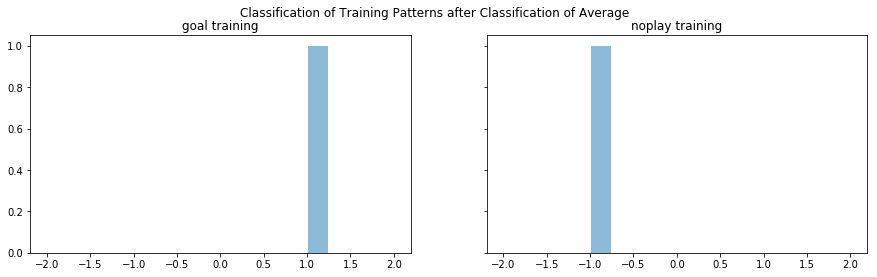

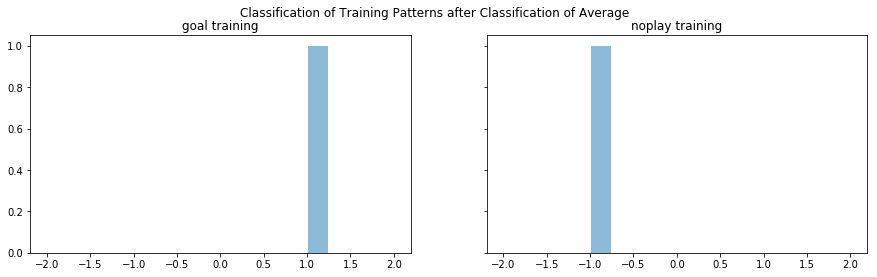

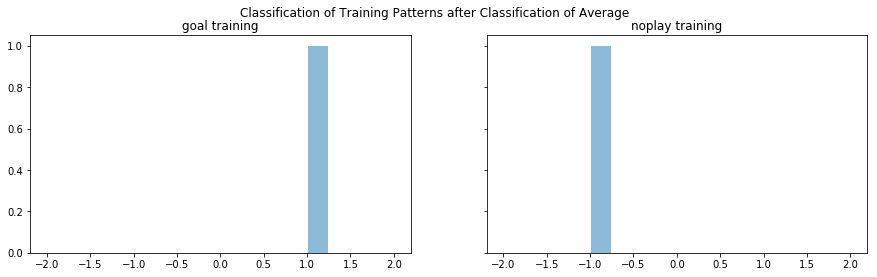

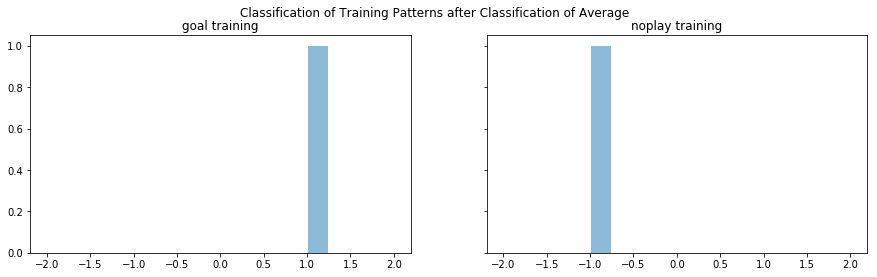

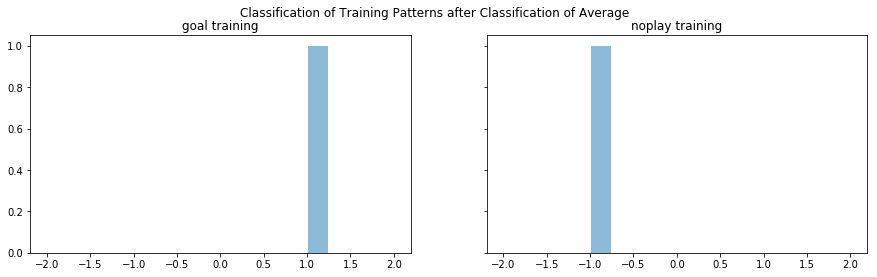

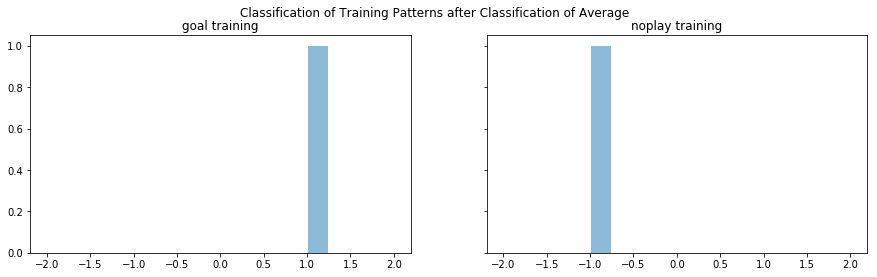

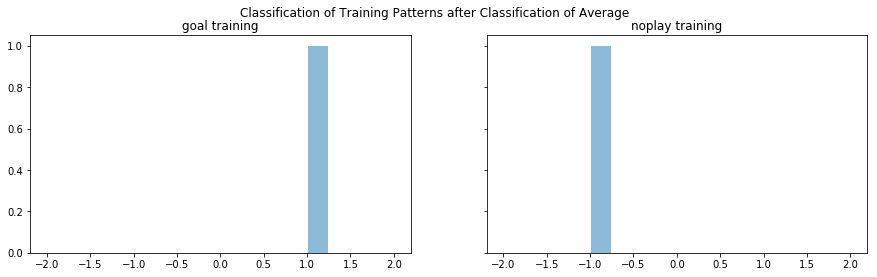

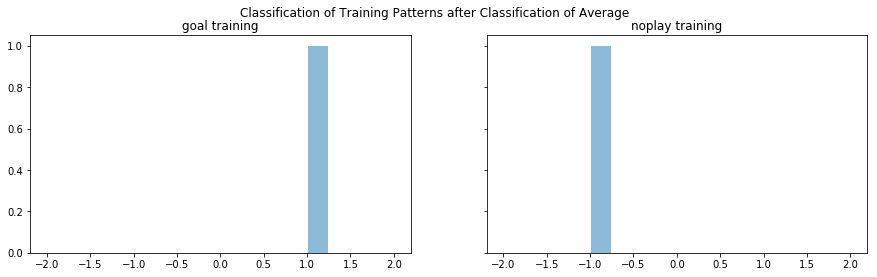

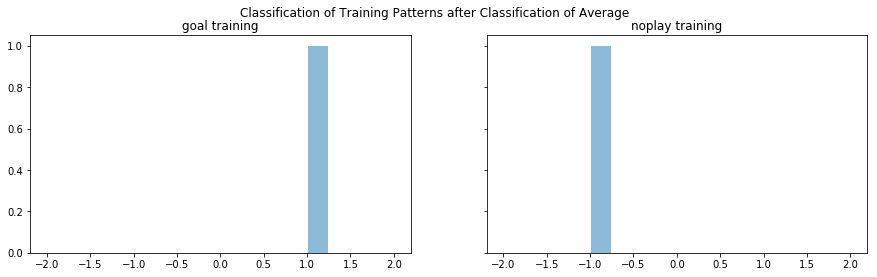

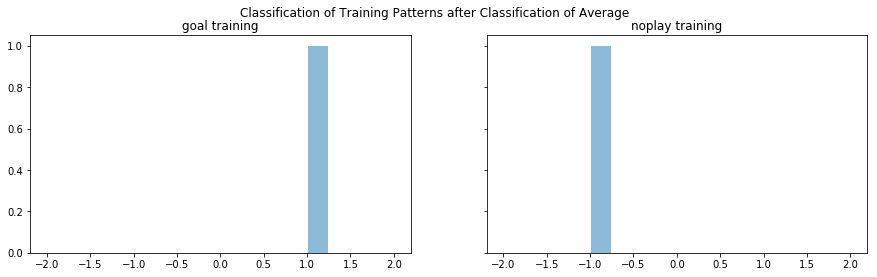

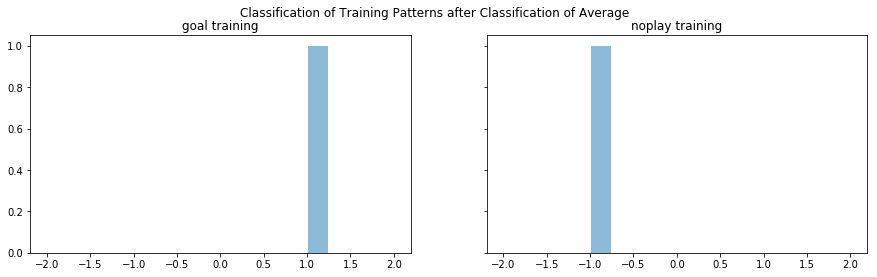

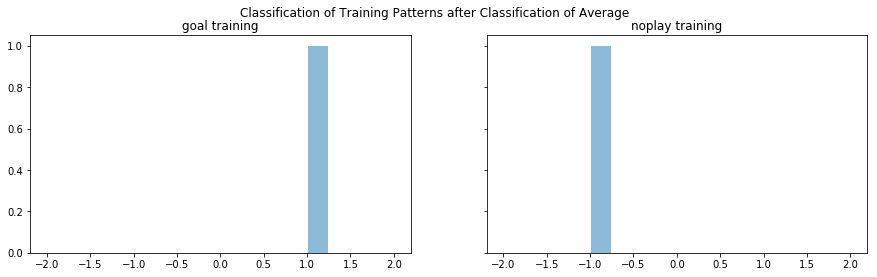

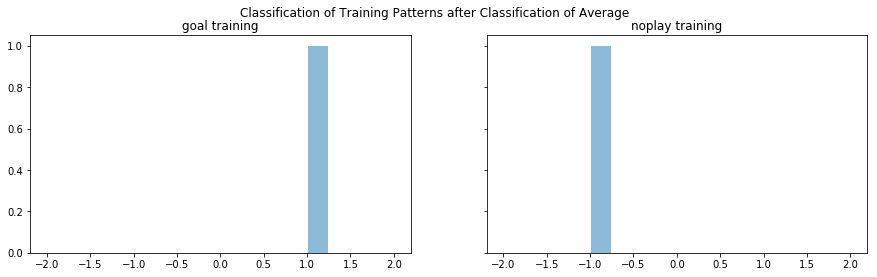

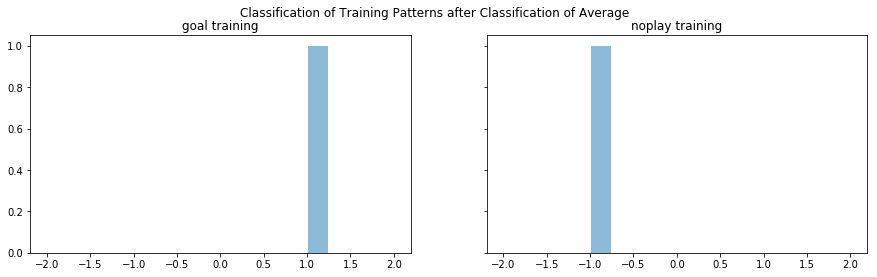

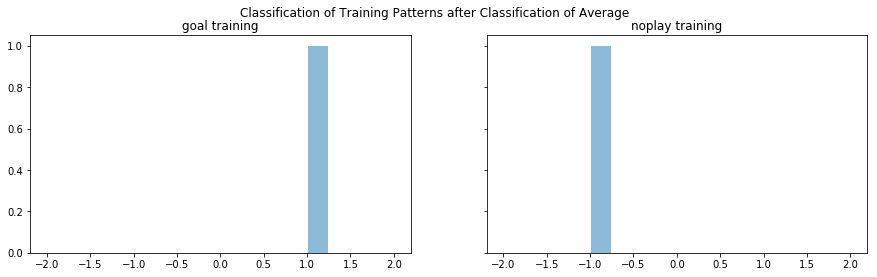

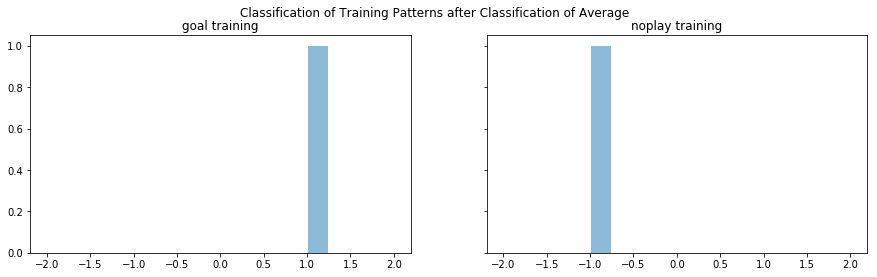

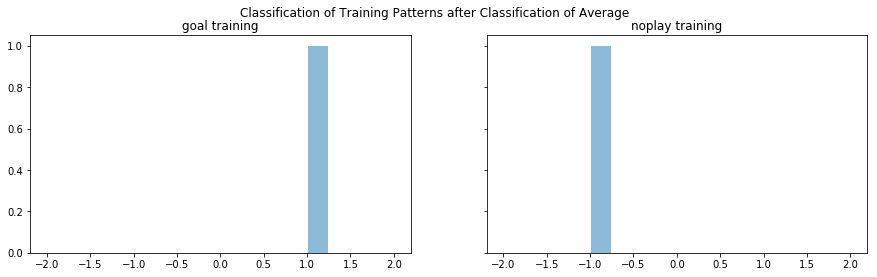

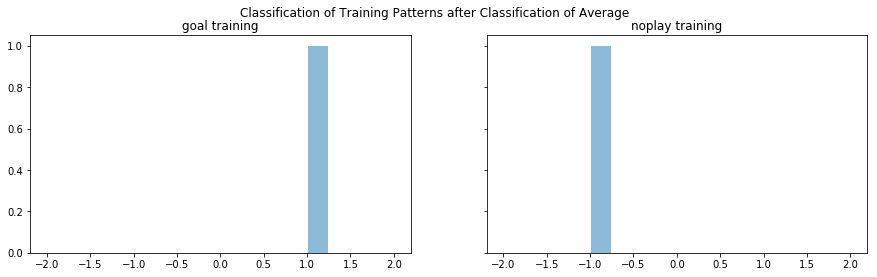

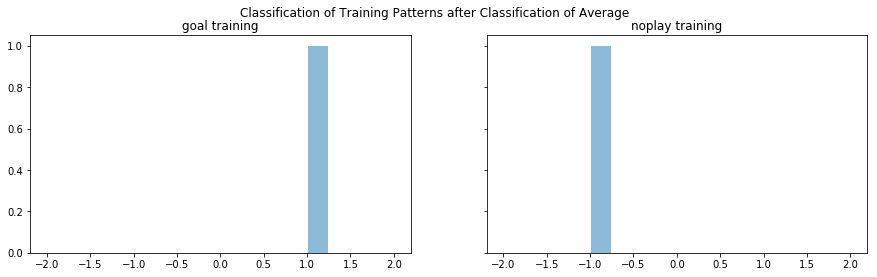

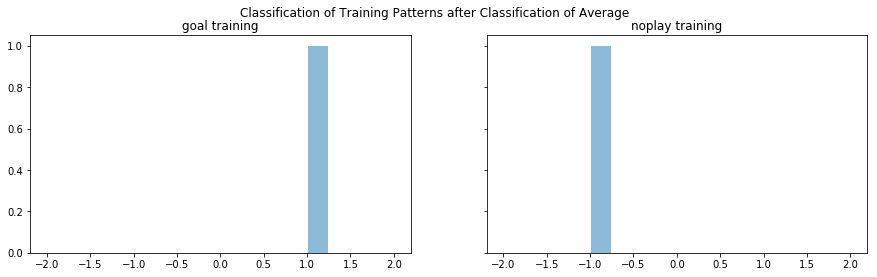

In [12]:
goal_training=data4.loc['output_goal_train']
noplay_training=data4.loc['output_noplay_train']
for r in range(20):
    b=np.hstack([goal_training.iloc[r]['output']])
    b_mean = np.mean(b)
    if np.isclose(b_mean, 1, atol=0.6):
        goal_training.iloc[r]['output'] = 1
    elif np.isclose(b_mean, 0, atol=0.3):
        goal_training.iloc[r]['output'] = 0  
    else:
        goal_training.iloc[r]['output'] = -1
    b=np.hstack([noplay_training.iloc[r]['output']])
    b_mean = np.mean(b)
    if np.isclose(b_mean, 1, atol=0.6):
        noplay_training.iloc[r]['output'] = 1
    elif np.isclose(b_mean, 0, atol=0.3):
        noplay_training.iloc[r]['output'] = 0  
    else:
        noplay_training.iloc[r]['output'] = -1
        
    bins=np.arange(-2, 2 + 0.25, 0.25)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
    f.suptitle('Classification of Training Patterns after Classification of Average')
    ax1.hist(goal_training.iloc[r], bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
    ax1.set_title('goal training')
    ax2.hist(noplay_training.iloc[r], bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
    ax2.set_title('noplay training')

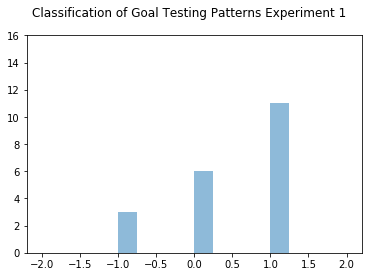

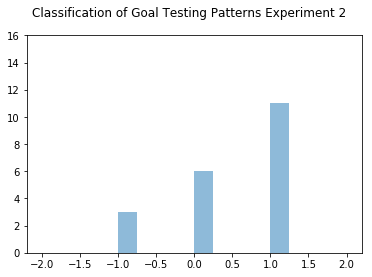

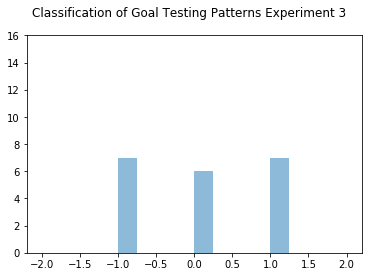

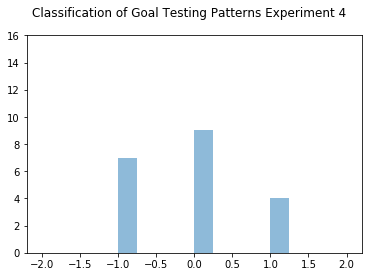

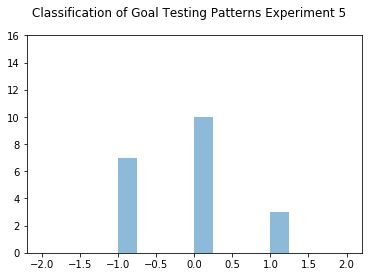

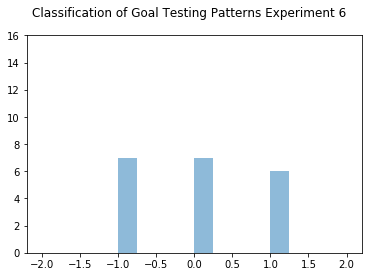

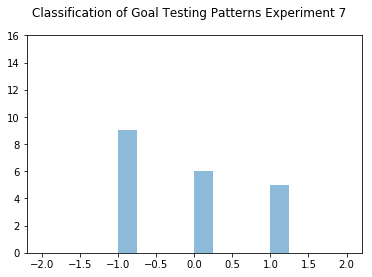

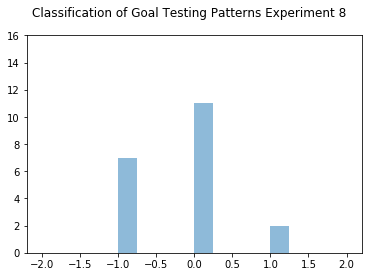

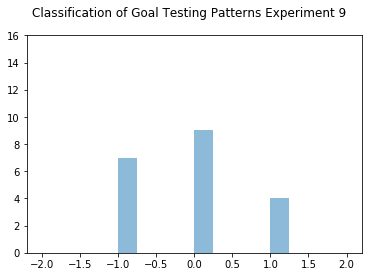

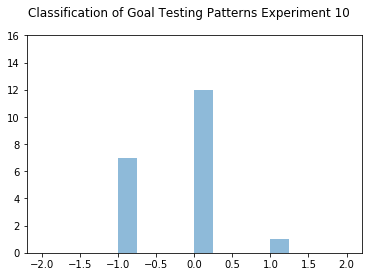

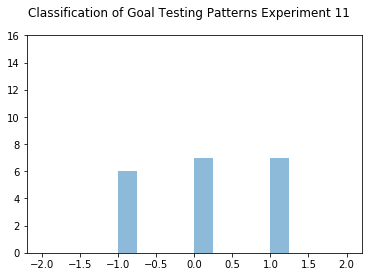

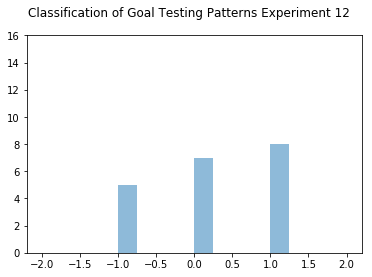

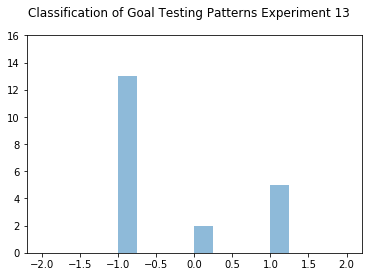

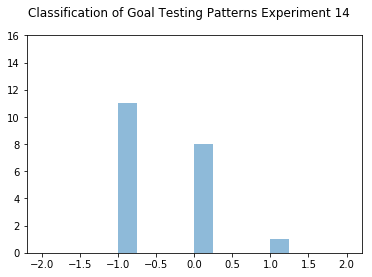

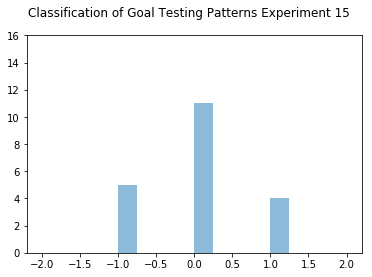

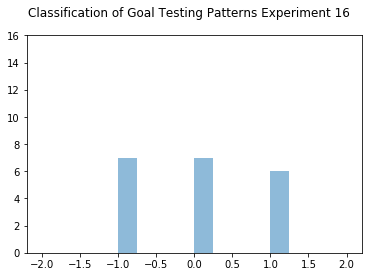

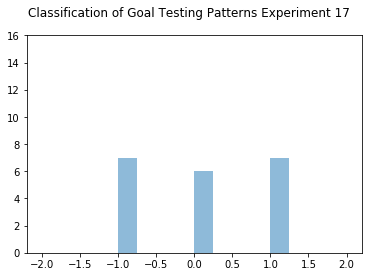

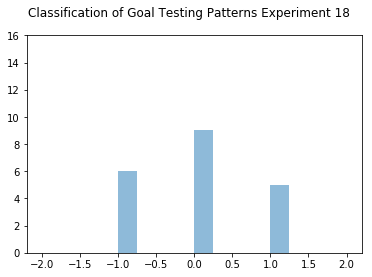

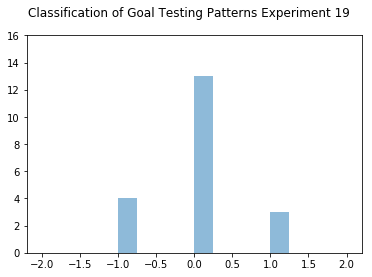

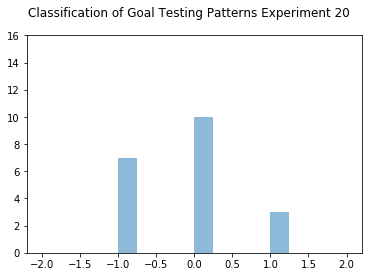

In [13]:
goal_testing=data4.loc['output_goal_test000': 'output_goal_test019']
for i in range(20):
    exp1 = goal_testing[i::20]    
    plt.figure()
    for r in range(len(exp1)):
        b=np.hstack([exp1.iloc[r]['output']])
        b_mean = np.mean(b)
        if np.isclose(b_mean, 1, atol=0.6):
            exp1.iloc[r]['output'] = 1
        elif np.isclose(b_mean, 0, atol=0.3):
            exp1.iloc[r]['output'] = 0  
        else:
            exp1.iloc[r]['output'] = -1
    plt.suptitle('Classification of Goal Testing Patterns Experiment %d' % int(i+1))
    plt.hist(exp1.T, bins, alpha = 0.5)
    plt.ylim(0, 16)
    #plt.plot(a)
    #plt.ylim((-2,2))


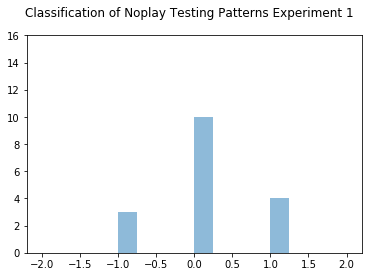

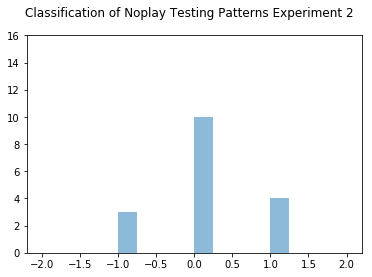

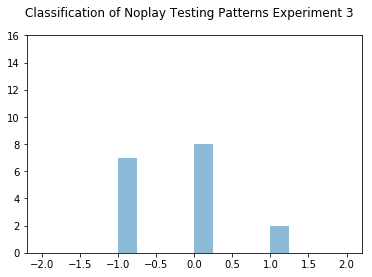

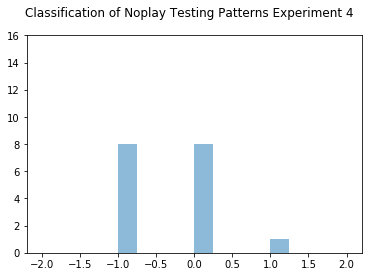

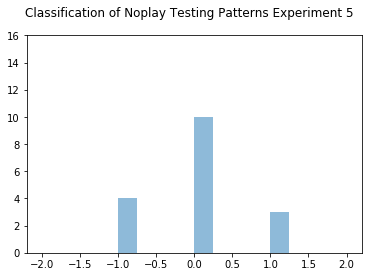

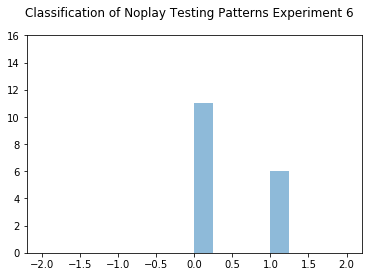

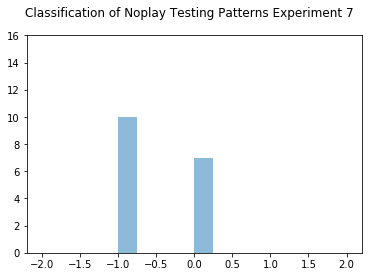

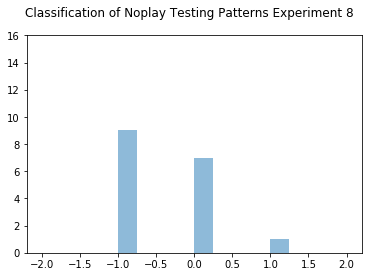

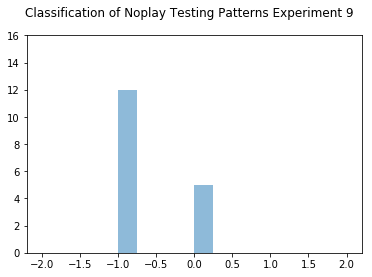

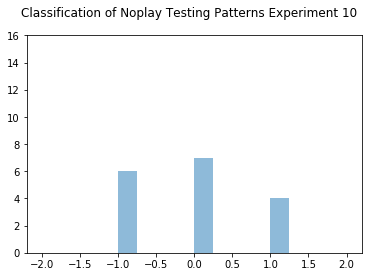

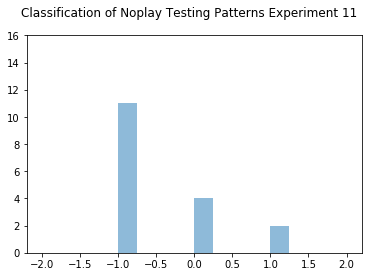

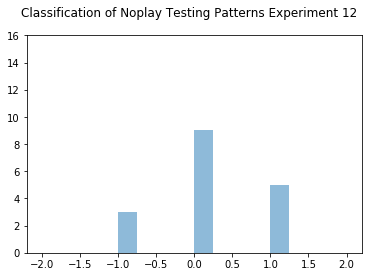

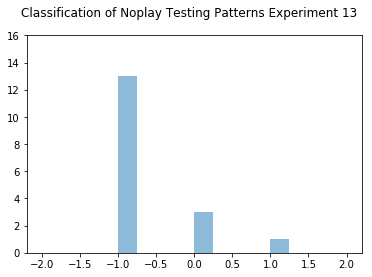

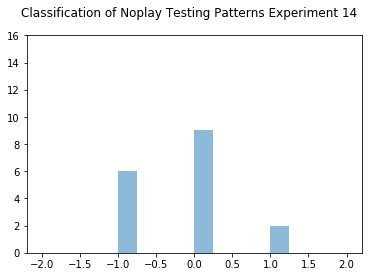

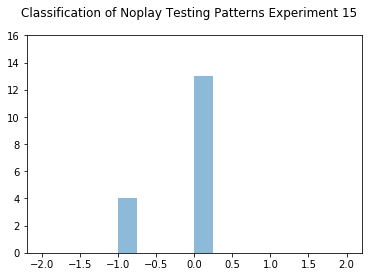

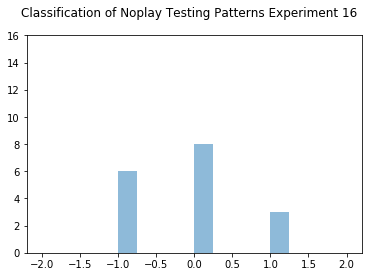

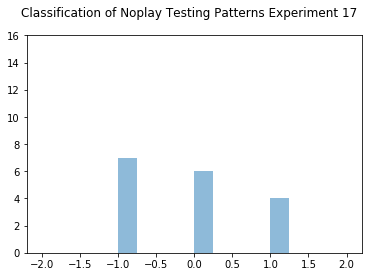

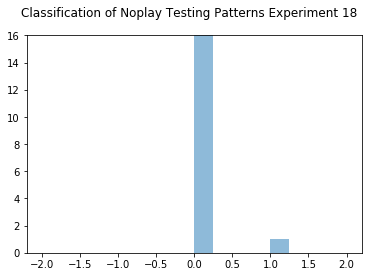

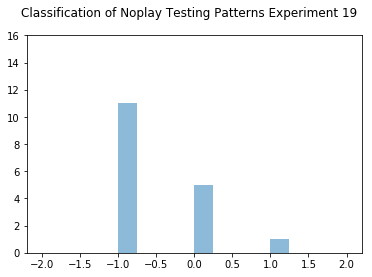

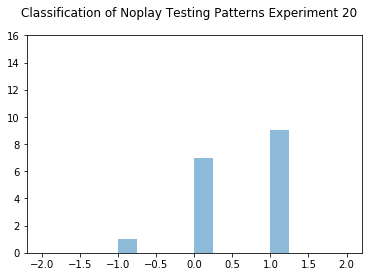

In [14]:
noplay_testing=data4.loc['output_noplay_test000': 'output_noplay_test016']
for i in range(20):
    exp1 = noplay_testing[i::20]    
    plt.figure()
    for r in range(len(exp1)):
        b=np.hstack([exp1.iloc[r]['output']])
        b_mean = np.mean(b)
        if np.isclose(b_mean, 1, atol=0.6):
            exp1.iloc[r]['output'] = 1
        elif np.isclose(b_mean, 0, atol=0.3):
            exp1.iloc[r]['output'] = 0  
        else:
            exp1.iloc[r]['output'] = -1
    plt.suptitle('Classification of Noplay Testing Patterns Experiment %d' % int(i+1))
    plt.hist(exp1.T, bins, alpha = 0.5)
    plt.ylim(0, 16)
    #plt.plot(a)
    #plt.ylim((-2,2))

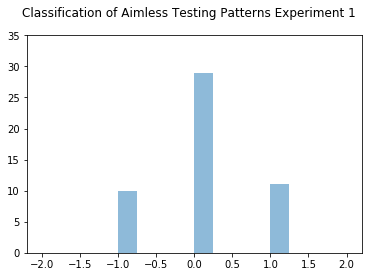

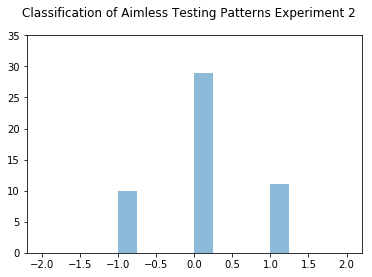

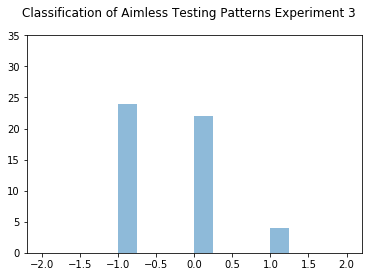

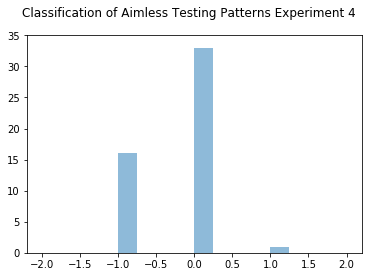

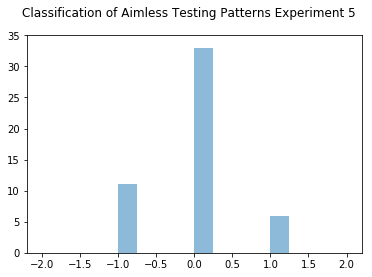

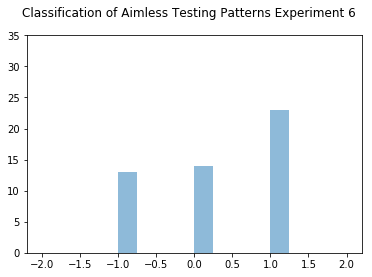

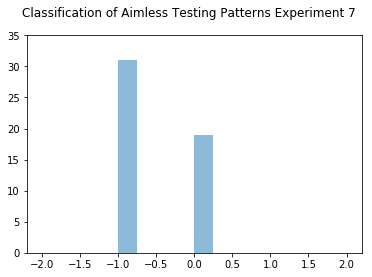

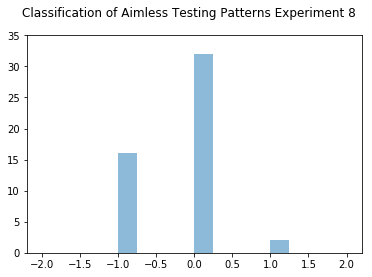

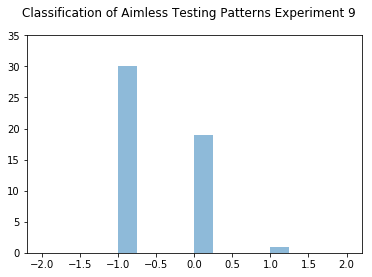

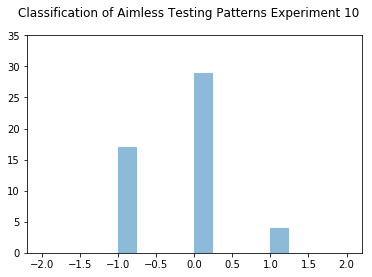

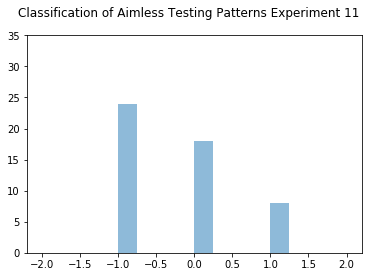

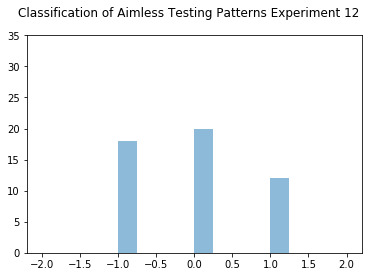

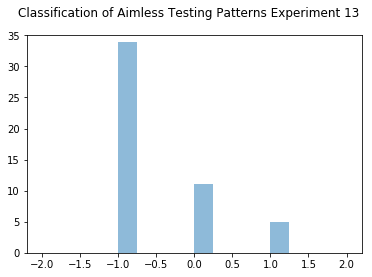

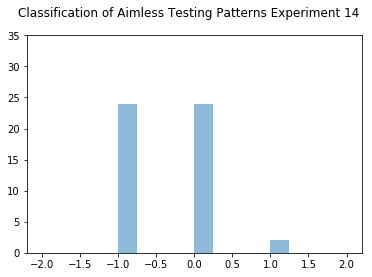

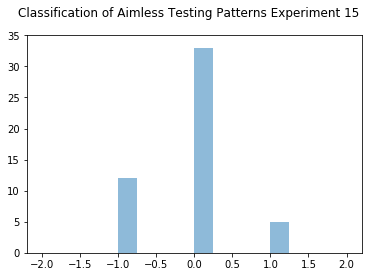

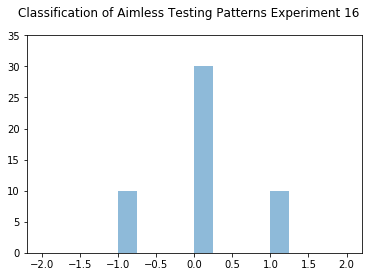

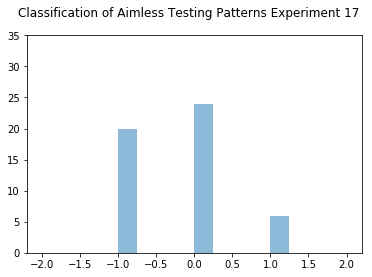

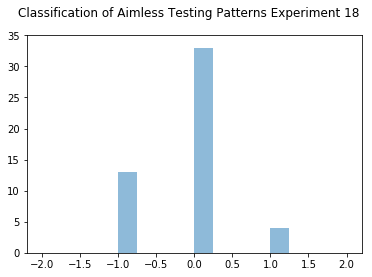

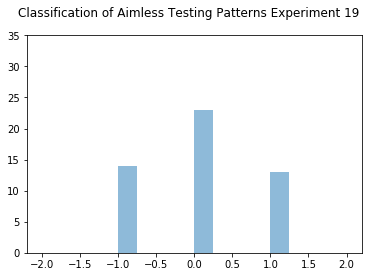

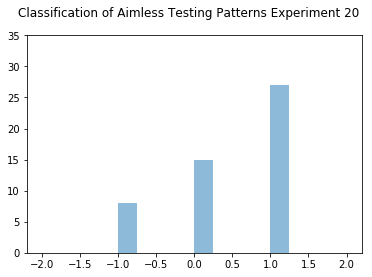

In [15]:
aimless_testing=data4.loc['output_aimless000': 'output_aimless049']
for i in range(20):
    exp1 = aimless_testing[i::20]    
    plt.figure()
    for r in range(len(exp1)):
        b=np.hstack([exp1.iloc[r]['output']])
        b_mean = np.mean(b)
        if np.isclose(b_mean, 1, atol=0.6):
            exp1.iloc[r]['output'] = 1
        elif np.isclose(b_mean, 0, atol=0.3):
            exp1.iloc[r]['output'] = 0  
        else:
            exp1.iloc[r]['output'] = -1
    plt.suptitle('Classification of Aimless Testing Patterns Experiment %d' % int(i+1))
    plt.hist(exp1.T, bins, alpha = 0.5)
    plt.ylim(0, 35)
    #plt.plot(a)
    #plt.ylim((-2,2))